In [15]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input


In [16]:
# Define constants
IMG_SIZE = 64
TRAIN_DATA_PATH = 'data/asl_alphabet_train/asl_alphabet_train'  # Replace with actual path
CLASS_NAMES = list(map(chr, range(65, 91)))  # A-Z letters


In [17]:
def load_data(data_path):
    images = []
    labels = []
    for class_name in CLASS_NAMES:
        class_folder = os.path.join(data_path, class_name)
        print(class_folder)
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
            img = img_to_array(img)
            img = preprocess_input(img)  # Preprocessing required for VGG16
            images.append(img)
            labels.append(class_name)
    return np.array(images), np.array(labels)

In [18]:
# Load the dataset
X, y = load_data(TRAIN_DATA_PATH)

data/asl_alphabet_train/asl_alphabet_train/A
data/asl_alphabet_train/asl_alphabet_train/B
data/asl_alphabet_train/asl_alphabet_train/C
data/asl_alphabet_train/asl_alphabet_train/D
data/asl_alphabet_train/asl_alphabet_train/E
data/asl_alphabet_train/asl_alphabet_train/F
data/asl_alphabet_train/asl_alphabet_train/G
data/asl_alphabet_train/asl_alphabet_train/H
data/asl_alphabet_train/asl_alphabet_train/I
data/asl_alphabet_train/asl_alphabet_train/J
data/asl_alphabet_train/asl_alphabet_train/K
data/asl_alphabet_train/asl_alphabet_train/L
data/asl_alphabet_train/asl_alphabet_train/M
data/asl_alphabet_train/asl_alphabet_train/N
data/asl_alphabet_train/asl_alphabet_train/O
data/asl_alphabet_train/asl_alphabet_train/P
data/asl_alphabet_train/asl_alphabet_train/Q
data/asl_alphabet_train/asl_alphabet_train/R
data/asl_alphabet_train/asl_alphabet_train/S
data/asl_alphabet_train/asl_alphabet_train/T
data/asl_alphabet_train/asl_alphabet_train/U
data/asl_alphabet_train/asl_alphabet_train/V
data/asl_a

In [19]:
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
# Reshape for KNN
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [21]:
# Initialize the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1)

In [22]:
# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
# Predict on the test dataset
y_pred = knn.predict(X_test)

In [24]:
# Print accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate and print empirical error
empirical_error = 1 - accuracy_score(y_test, y_pred)
print(f'Empirical error: {empirical_error}')

Accuracy: 0.9944444444444445
              precision    recall  f1-score   support

           A       0.99      1.00      1.00       898
           B       0.99      0.99      0.99       865
           C       1.00      1.00      1.00       929
           D       1.00      1.00      1.00       873
           E       0.98      0.98      0.98       892
           F       1.00      0.99      1.00       883
           G       1.00      1.00      1.00       888
           H       1.00      1.00      1.00       878
           I       0.99      0.99      0.99       880
           J       1.00      1.00      1.00       918
           K       0.99      1.00      0.99       926
           L       1.00      1.00      1.00       923
           M       1.00      1.00      1.00       928
           N       1.00      1.00      1.00       929
           O       1.00      1.00      1.00       896
           P       1.00      1.00      1.00       897
           Q       1.00      1.00      1.00       88

In [25]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=CLASS_NAMES)
print(conf_mat)

# Create a DataFrame from confusion matrix
df_cm = pd.DataFrame(conf_mat, index=[i for i in CLASS_NAMES], columns=[i for i in CLASS_NAMES])


[[895   0   1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   1   0   0   0   0   0   0]
 [  0 855   0   0   8   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   2   0   0   0]
 [  1   0 928   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0 870   0   0   0   0   0   0   0   0   0   0   3   0   0   0
    0   0   0   0   0   0   0   0]
 [  4   4   0   0 878   0   0   0   2   0   0   0   0   0   0   0   0   0
    2   0   0   0   2   0   0   0]
 [  0   0   0   0   0 878   0   0   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   3   0   0   0]
 [  0   0   0   0   0   0 887   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 878   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 875   0   1   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

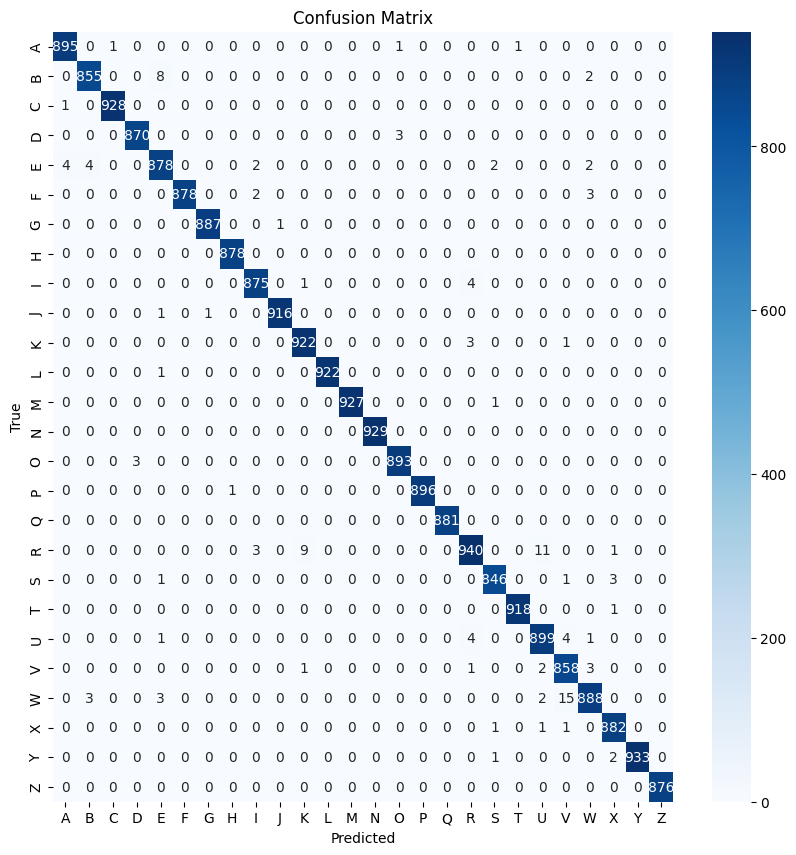

In [26]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score : ', accuracy_score(y_test, y_pred))
print('Precision score : ', precision_score(y_test, y_pred, average='weighted'))
print('Recall score : ',recall_score(y_test, y_pred, average='weighted'))
print('F1 score : ', f1_score(y_test, y_pred, average='weighted'))

Accuracy score :  0.9944444444444445
Precision score :  0.994458110222164
Recall score :  0.9944444444444445
F1 score :  0.9944434696284139


In [46]:
# ... your previous code

from tabulate import tabulate

# Define the path of the test data
TEST_DATA_PATH = 'data/asl_alphabet_test/asl_alphabet_test'
PERSONAL_TEST_DATA_PATH = 'OurAlphabet'

def predict_image(image_path, model, img_size=IMG_SIZE):
    img = load_img(image_path, target_size=(img_size, img_size))
    img = img_to_array(img)
    img = preprocess_input(img)  # Preprocessing required for VGG16
    img = img.reshape(1, -1)  # Reshape for KNN
    prediction = model.predict(img)
    return prediction[0]

# Create two DataFrames to store the results
test_results = pd.DataFrame(columns=['Image', 'True Label', 'Predicted Label'])
personal_results = pd.DataFrame(columns=['Image', 'True Label', 'Predicted Label'])

# Test with the provided test data
for class_name in CLASS_NAMES:
    img_name = f'{class_name}_test.jpg'
    img_path = os.path.join(TEST_DATA_PATH, img_name)
    predicted_label = predict_image(img_path, knn)
    test_results = pd.concat([test_results, pd.DataFrame({
        'Image': [img_name], 
        'True Label': [class_name], 
        'Predicted Label': [predicted_label]
    })])

# Drop 'Image' column and display the table
test_results = test_results.drop(columns=['Image'])
print("\nResults for provided test data:")
print(tabulate(test_results, headers='keys', tablefmt='pretty', showindex=False))

# Test with your personal hand images
for class_name in os.listdir(PERSONAL_TEST_DATA_PATH):
    img_name = f'{class_name}'
    img_path = os.path.join(PERSONAL_TEST_DATA_PATH, img_name)
    predicted_label = predict_image(img_path, knn)
    personal_results = pd.concat([personal_results, pd.DataFrame({
        'Image': [img_name], 
        'True Label': [class_name], 
        'Predicted Label': [predicted_label]
    })])

# Drop 'Image' column and display the table
personal_results = personal_results.drop(columns=['Image'])
print("\nResults for personal hand images:")
print(tabulate(personal_results, headers='keys', tablefmt='pretty', showindex=False))



Results for provided test data:
+------------+-----------------+
| True Label | Predicted Label |
+------------+-----------------+
|     A      |        A        |
|     B      |        B        |
|     C      |        C        |
|     D      |        D        |
|     E      |        E        |
|     F      |        F        |
|     G      |        G        |
|     H      |        H        |
|     I      |        I        |
|     J      |        J        |
|     K      |        K        |
|     L      |        L        |
|     M      |        M        |
|     N      |        N        |
|     O      |        O        |
|     P      |        P        |
|     Q      |        Q        |
|     R      |        R        |
|     S      |        S        |
|     T      |        T        |
|     U      |        U        |
|     V      |        V        |
|     W      |        W        |
|     X      |        X        |
|     Y      |        Y        |
|     Z      |        Z        |
+---------

# 10 neighbors

In [8]:
# Initialize the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10)

In [9]:
# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [10]:
# Predict on the test dataset
y_pred = knn.predict(X_test)

In [11]:
# Print accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate and print empirical error
empirical_error = 1 - accuracy_score(y_test, y_pred)
print(f'Empirical error: {empirical_error}')

Accuracy: 0.9394017094017094
              precision    recall  f1-score   support

           A       0.90      0.94      0.92       898
           B       0.93      0.95      0.94       865
           C       0.99      0.95      0.97       929
           D       0.93      0.97      0.95       873
           E       0.88      0.91      0.90       892
           F       0.99      0.93      0.96       883
           G       0.98      0.95      0.97       888
           H       0.95      0.99      0.97       878
           I       0.93      0.96      0.95       880
           J       0.98      0.97      0.98       918
           K       0.94      0.95      0.94       926
           L       0.97      0.97      0.97       923
           M       0.94      0.95      0.95       928
           N       0.98      0.96      0.97       929
           O       0.97      0.94      0.96       896
           P       0.99      0.96      0.98       897
           Q       0.99      0.99      0.99       88

In [12]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=CLASS_NAMES)
print(conf_mat)

# Create a DataFrame from confusion matrix
df_cm = pd.DataFrame(conf_mat, index=[i for i in CLASS_NAMES], columns=[i for i in CLASS_NAMES])

[[845   0   3   8  16   0   0   0   1   0   0   0   5   0   4   0   0   0
   11   1   0   0   0   0   0   4]
 [  2 818   0   1  22   3   0   0   2   0   3   1   0   0   0   0   0   0
    0   0   5   1   7   0   0   0]
 [  6   0 887  27   1   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   7]
 [ 11   4   2 844   4   0   0   0   0   0   0   1   0   0   7   0   0   0
    0   0   0   0   0   0   0   0]
 [ 32  22   0   1 816   2   0   0   6   0   3   0   1   0   0   0   0   0
    5   2   1   0   1   0   0   0]
 [ 15   6   0   1  15 821   1   0  10   1   3   0   5   0   0   0   0   0
    1   0   0   0   2   0   2   0]
 [  2   0   0   0   3   0 845  25   2   5   0   0   0   0   0   0   0   4
    0   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   4 865   0   1   0   0   0   0   0   2   0   0
    0   0   0   0   2   4   0   0]
 [  6   1   0   4   1   0   0   0 848   0   8   0   0   0   0   0   0   5
    0   0   0   0   0   6   0   1]
 [  0   0   0   0  

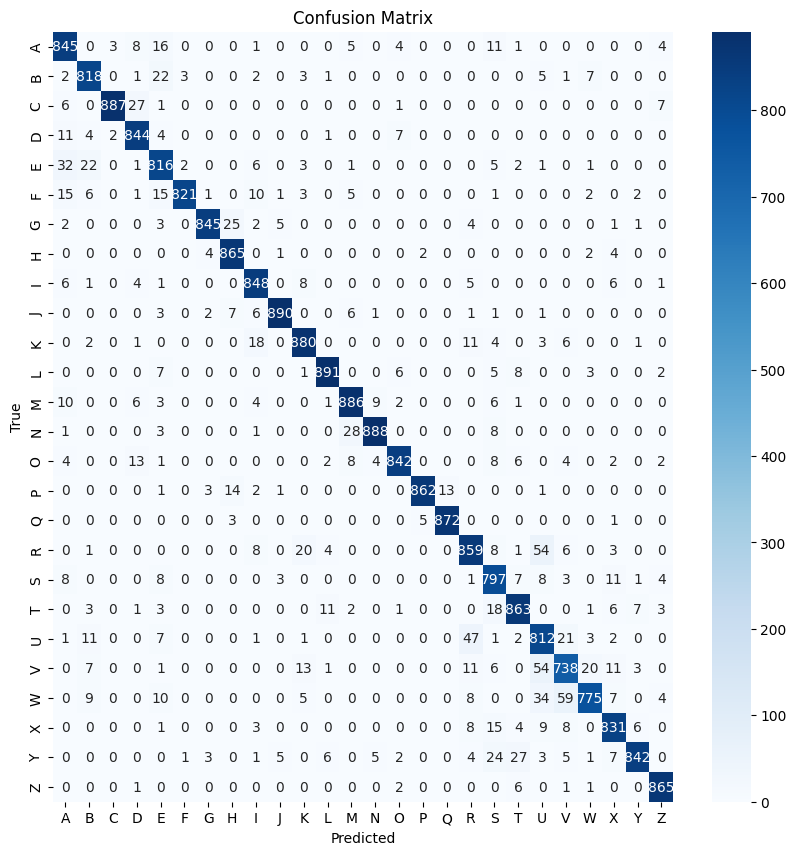

In [13]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score : ', accuracy_score(y_test, y_pred))
print('Precision score : ', precision_score(y_test, y_pred, average='weighted'))
print('Recall score : ',recall_score(y_test, y_pred, average='weighted'))
print('F1 score : ', f1_score(y_test, y_pred, average='weighted'))

Accuracy score :  0.9394017094017094
Precision score :  0.9407000234824646
Recall score :  0.9394017094017094
F1 score :  0.9396025222201165


# 5 neighbors

In [16]:
# Initialize the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [17]:
# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
# Predict on the test dataset
y_pred = knn.predict(X_test)

In [19]:
# Print accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate and print empirical error
empirical_error = 1 - accuracy_score(y_test, y_pred)
print(f'Empirical error: {empirical_error}')

Accuracy: 0.9695726495726495
              precision    recall  f1-score   support

           A       0.95      0.97      0.96       898
           B       0.96      0.98      0.97       865
           C       1.00      0.98      0.99       929
           D       0.97      0.98      0.98       873
           E       0.94      0.95      0.94       892
           F       1.00      0.97      0.98       883
           G       1.00      0.98      0.99       888
           H       0.97      1.00      0.98       878
           I       0.96      0.99      0.97       880
           J       0.99      0.99      0.99       918
           K       0.96      0.98      0.97       926
           L       0.99      0.99      0.99       923
           M       0.98      0.98      0.98       928
           N       0.99      0.99      0.99       929
           O       0.98      0.97      0.98       896
           P       1.00      0.97      0.99       897
           Q       0.99      1.00      0.99       88

In [20]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=CLASS_NAMES)
print(conf_mat)

# Create a DataFrame from confusion matrix
df_cm = pd.DataFrame(conf_mat, index=[i for i in CLASS_NAMES], columns=[i for i in CLASS_NAMES])

[[869   2   3   3  11   0   0   0   1   0   0   0   1   0   2   0   0   0
    5   1   0   0   0   0   0   0]
 [  2 847   0   0  12   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   3   0   0   0]
 [  6   0 914   7   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   2]
 [  4   3   1 856   0   0   0   0   0   0   0   0   0   0   9   0   0   0
    0   0   0   0   0   0   0   0]
 [ 15  10   0   1 848   0   0   0   7   0   2   1   1   0   0   0   0   0
    4   1   0   0   2   0   0   0]
 [  6   2   0   0   7 856   0   0   6   0   0   0   3   0   0   0   0   0
    1   0   0   0   2   0   0   0]
 [  0   0   0   0   2   0 869  14   0   2   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 875   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   2   0   0]
 [  1   0   0   2   0   0   0   0 868   0   4   0   0   0   0   0   0   5
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

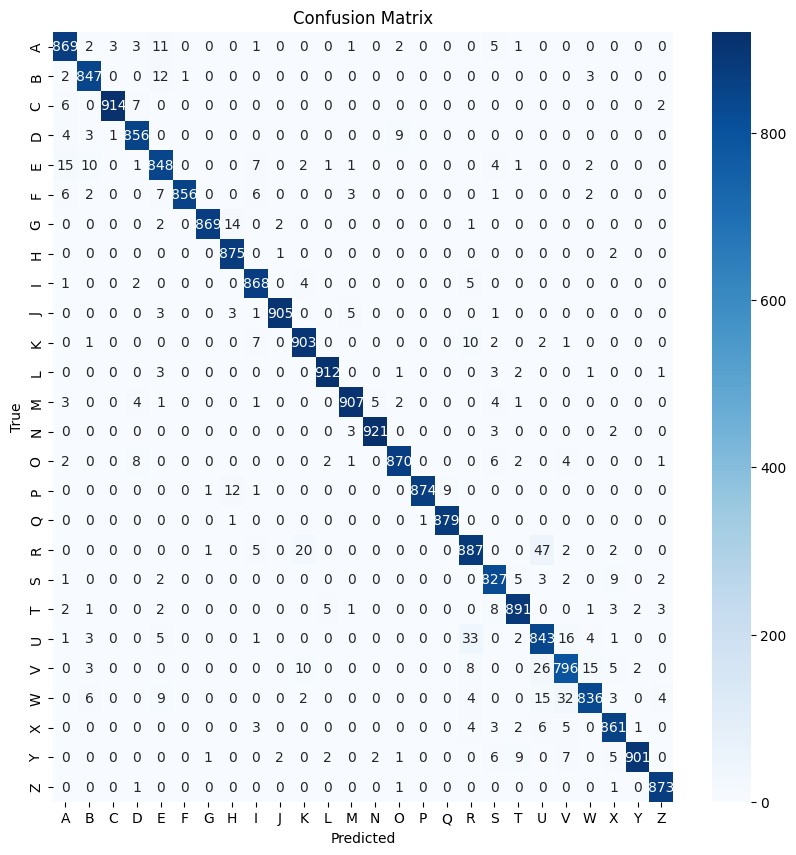

In [21]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score : ', accuracy_score(y_test, y_pred))
print('Precision score : ', precision_score(y_test, y_pred, average='weighted'))
print('Recall score : ',recall_score(y_test, y_pred, average='weighted'))
print('F1 score : ', f1_score(y_test, y_pred, average='weighted'))

Accuracy score :  0.9695726495726495
Precision score :  0.9698530525365855
Recall score :  0.9695726495726495
F1 score :  0.9696114655676231


# 2 neighbors

In [23]:
# Initialize the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=2)

In [24]:
# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [25]:
# Predict on the test dataset
y_pred = knn.predict(X_test)

In [26]:
# Print accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate and print empirical error
empirical_error = 1 - accuracy_score(y_test, y_pred)
print(f'Empirical error: {empirical_error}')

Accuracy: 0.9870940170940171
              precision    recall  f1-score   support

           A       0.97      1.00      0.98       898
           B       0.97      0.99      0.98       865
           C       1.00      0.99      1.00       929
           D       0.98      1.00      0.99       873
           E       0.97      0.97      0.97       892
           F       1.00      0.98      0.99       883
           G       0.99      1.00      1.00       888
           H       0.99      1.00      0.99       878
           I       0.98      1.00      0.99       880
           J       1.00      0.99      0.99       918
           K       0.97      0.99      0.98       926
           L       1.00      1.00      1.00       923
           M       1.00      1.00      1.00       928
           N       1.00      1.00      1.00       929
           O       1.00      0.99      0.99       896
           P       1.00      0.99      0.99       897
           Q       1.00      1.00      1.00       88

In [27]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=CLASS_NAMES)
print(conf_mat)

# Create a DataFrame from confusion matrix
df_cm = pd.DataFrame(conf_mat, index=[i for i in CLASS_NAMES], columns=[i for i in CLASS_NAMES])

[[895   0   1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   1   0   0   0   0   0   0]
 [  0 856   0   0   7   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   2   0   0   0]
 [  5   0 924   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 869   0   0   0   0   0   0   0   0   0   0   3   0   0   0
    0   0   0   0   0   0   0   0]
 [ 14   9   0   1 866   0   0   0   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0   0   0]
 [  4   1   0   1   5 869   0   0   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0   0   0]
 [  2   0   0   0   0   0 885   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 878   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0   0 876   0   1   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

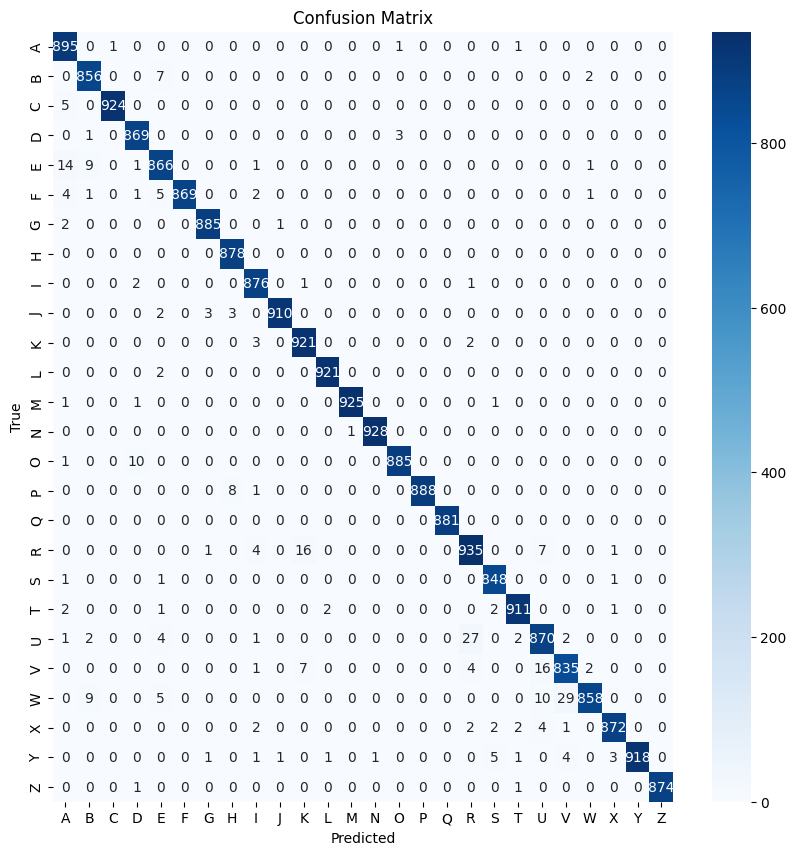

In [28]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score : ', accuracy_score(y_test, y_pred))
print('Precision score : ', precision_score(y_test, y_pred, average='weighted'))
print('Recall score : ',recall_score(y_test, y_pred, average='weighted'))
print('F1 score : ', f1_score(y_test, y_pred, average='weighted'))

Accuracy score :  0.9870940170940171
Precision score :  0.9871979996967561
Recall score :  0.9870940170940171
F1 score :  0.9870891719497871
